In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
train_df=pd.read_csv('train.csv')

In [3]:
df1=train_df.copy()

In [4]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

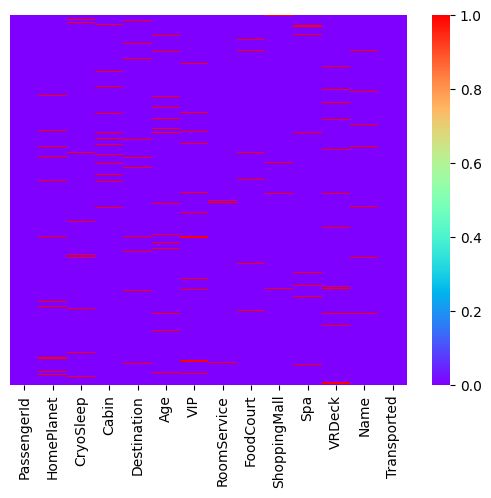

In [6]:
sns.heatmap(df1.isna(),cmap='rainbow',yticklabels=False)

In [7]:
df1.loc[df1['HomePlanet'].isna()==True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [8]:
df1['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [9]:
from sklearn.impute import SimpleImputer
si_mode=SimpleImputer(strategy='most_frequent')
si_mean=SimpleImputer(strategy='mean')

In [10]:
df1['HomePlanet']=si_mode.fit_transform(df1[['HomePlanet']]).ravel()

In [11]:
df1.HomePlanet.isna().sum()

np.int64(0)

In [12]:
df1.loc[df1['CryoSleep'].isna()==True]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch,True
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez,False
8664,9246_01,Earth,NaN,G/1490/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True


In [13]:
df1.loc[df1['CryoSleep']==True][['Spa','RoomService','FoodCourt','ShoppingMall',]].value_counts()

Spa  RoomService  FoodCourt  ShoppingMall
0.0  0.0          0.0        0.0             2744
Name: count, dtype: int64

In [14]:
df1.loc[(df1['RoomService']==0.0) & (df1['FoodCourt']==0.0) & (df1['ShoppingMall']==0.0) & (df1['Spa']==0.0) & (df1['VRDeck']==0.0)]['CryoSleep'].value_counts()

CryoSleep
True     2690
False     470
Name: count, dtype: int64

<Axes: xlabel='RoomService', ylabel='Count'>

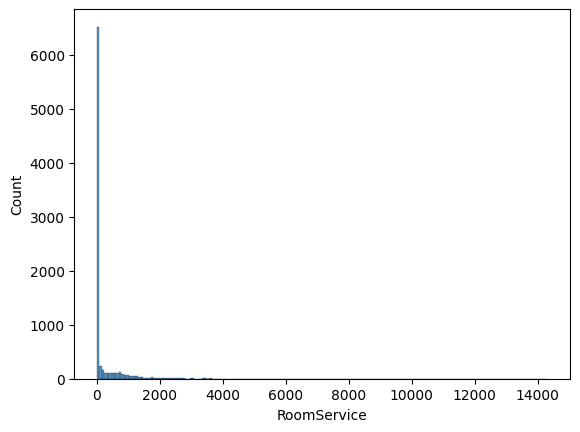

In [15]:
sns.histplot(df1,x='RoomService')

In [16]:
df1['RoomService']=si_mode.fit_transform(df1[['RoomService']]).ravel()

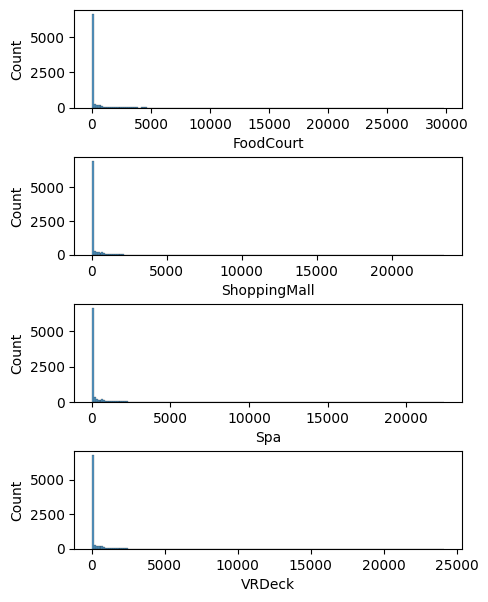

<Figure size 500x1000 with 0 Axes>

In [17]:
fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(5,7))
fig.subplots_adjust(hspace=0.5)
plt.figure(figsize=(5,10))

for i,col in enumerate(['FoodCourt','ShoppingMall','Spa','VRDeck']):
    sns.histplot(x=df1[col],ax=axes[i])
    axes[i]

In [18]:
df1['FoodCourt']=si_mode.fit_transform(df1[['FoodCourt']]).ravel()
df1['ShoppingMall']=si_mode.fit_transform(df1[['ShoppingMall']]).ravel()
df1['Spa']=si_mode.fit_transform(df1[['Spa']]).ravel()
df1['VRDeck']=si_mode.fit_transform(df1[['VRDeck']]).ravel()

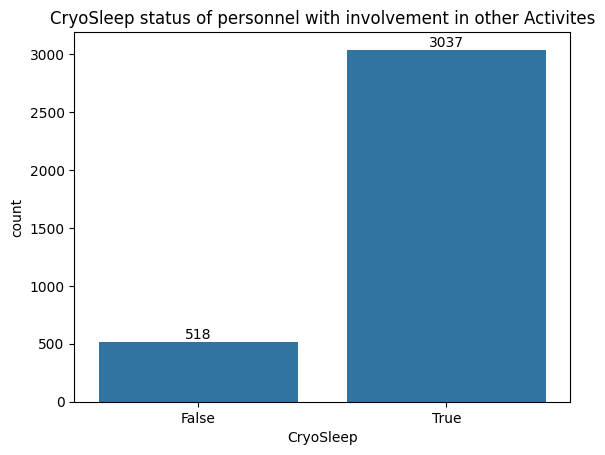

In [19]:
plt.title('CryoSleep status of personnel with involvement in other Activites')
axes=sns.barplot(
    df1.loc[(df1['RoomService']==0.0) & (df1['FoodCourt']==0.0) & (df1['ShoppingMall']==0.0) & (df1['Spa']==0.0) & (df1['VRDeck']==0.0)]['CryoSleep'].value_counts().reset_index(),
    x='CryoSleep',y='count')
for i in axes.containers:
    axes.bar_label(i)
    

In [20]:
(518/(518+3037))*100

14.571026722925456

In [21]:
df1.loc[(df1['RoomService']==0.0) 
        & (df1['FoodCourt']==0.0) 
        & (df1['ShoppingMall']==0.0) 
        & (df1['Spa']==0.0) 
        & (df1['VRDeck']==0.0) 
        & (df1['CryoSleep'].isna()==True),'CryoSleep']=True

In [22]:
df1.loc[df1['CryoSleep'].isna()==True,'CryoSleep']=False

In [23]:
df1.CryoSleep.isna().sum()

np.int64(0)

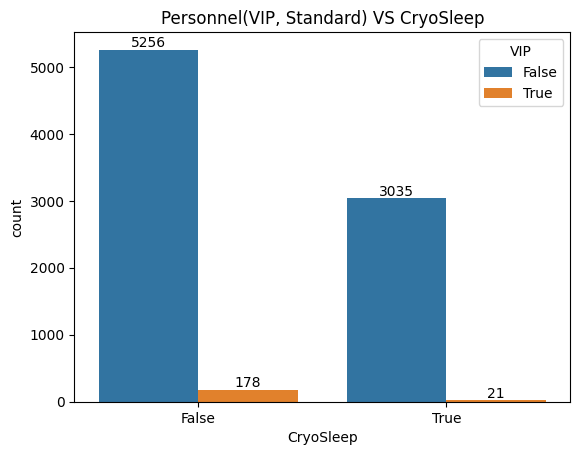

In [24]:
ax=sns.barplot(df1.groupby(['CryoSleep','VIP']).size().reset_index().rename(columns={0:'count'}),x='CryoSleep',y='count',hue='VIP')
plt.title('Personnel(VIP, Standard) VS CryoSleep')
for i in ax.containers:
    ax.bar_label(i)

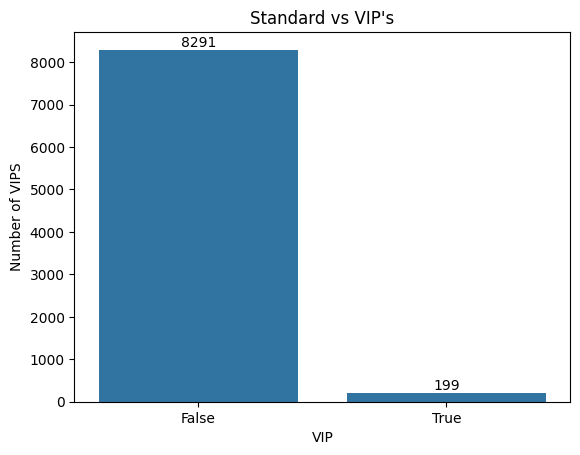

In [25]:
plt.title("Standard vs VIP's")
ax=sns.barplot(df1.groupby('VIP').size().reset_index().rename(columns={0:'Number of VIPS'}),x='VIP',y='Number of VIPS')
for i in ax.containers:
    ax.bar_label(i)

In [26]:
df1.isna().sum()[df1.isna().sum()!=0]

Cabin          199
Destination    182
Age            179
VIP            203
Name           200
dtype: int64

In [27]:
df1['Age']=si_mean.fit_transform(df1[['Age']]).ravel()

<Axes: title={'center': "Age Distribution of VIP'S"}, xlabel='Age', ylabel='Count'>

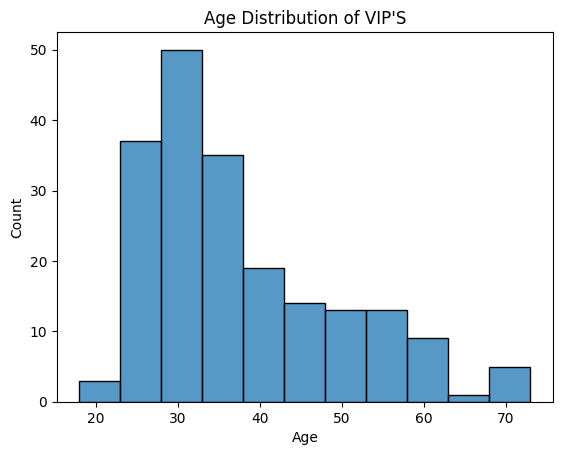

In [28]:
plt.title("Age Distribution of VIP'S")
sns.histplot(df1.loc[df1['VIP']==True],x='Age')

In [29]:
df1.loc[(df1['RoomService']!=0.0) 
        & (df1['FoodCourt']!=0.0) 
        & (df1['ShoppingMall']!=0.0) 
        & (df1['Spa']!=0.0) 
        & (df1['VRDeck']!=0.0) 
        & (df1['VIP'].isna()==True)
        &(df1['Age']>20),'VIP']=True

In [30]:
df1.loc[df1['VIP'].isna()==True,'VIP']=False

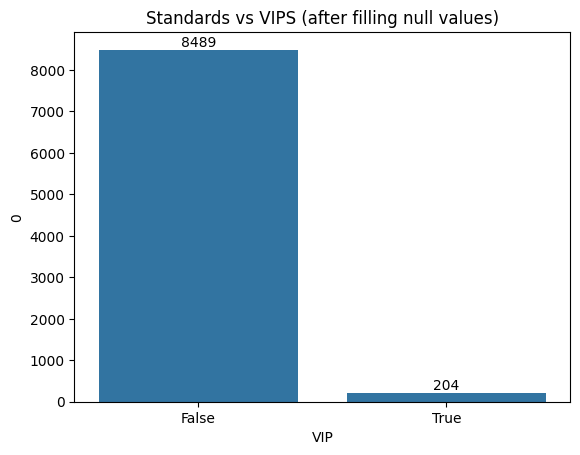

In [31]:
plt.title("Standards vs VIPS (after filling null values)")
ax=sns.barplot(df1.groupby('VIP').size().reset_index(),x='VIP',y=0)
for i in ax.containers:
    ax.bar_label(i)

In [32]:
df1.isna().sum()[df1.isna().sum()!=0]

Cabin          199
Destination    182
Name           200
dtype: int64

In [33]:
df1['Destination']=si_mode.fit_transform(df1[['Destination']]).ravel()

In [34]:
df1.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder()
le=LabelEncoder()

In [36]:
oe.fit(df1[['HomePlanet']])
encoded_cols_home_planet=oe.get_feature_names_out()
print(encoded_cols_home_planet)

['HomePlanet_Earth' 'HomePlanet_Europa' 'HomePlanet_Mars']


In [37]:
df1[encoded_cols_home_planet]=oe.transform(df1[['HomePlanet']]).toarray()

In [38]:
le_cols=['CryoSleep','VIP','Transported',]
for i in range(len(le_cols)):
    df1[le_cols[i]]=le.fit_transform(df1[le_cols[i]])

In [39]:
oe.fit(df1[['Destination']])
encoded_cols_destination=oe.get_feature_names_out()
print(encoded_cols_destination)

['Destination_55 Cancri e' 'Destination_PSO J318.5-22'
 'Destination_TRAPPIST-1e']


In [40]:
df1[encoded_cols_destination]=oe.transform(df1[['Destination']]).toarray()

In [41]:
df1.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,1.0,0.0,0.0,0.0,1.0


In [42]:
final_cols=list(df1.drop(columns=['PassengerId','Cabin','Destination','Name','HomePlanet']).columns)
fin_df=df1[final_cols]
fin_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

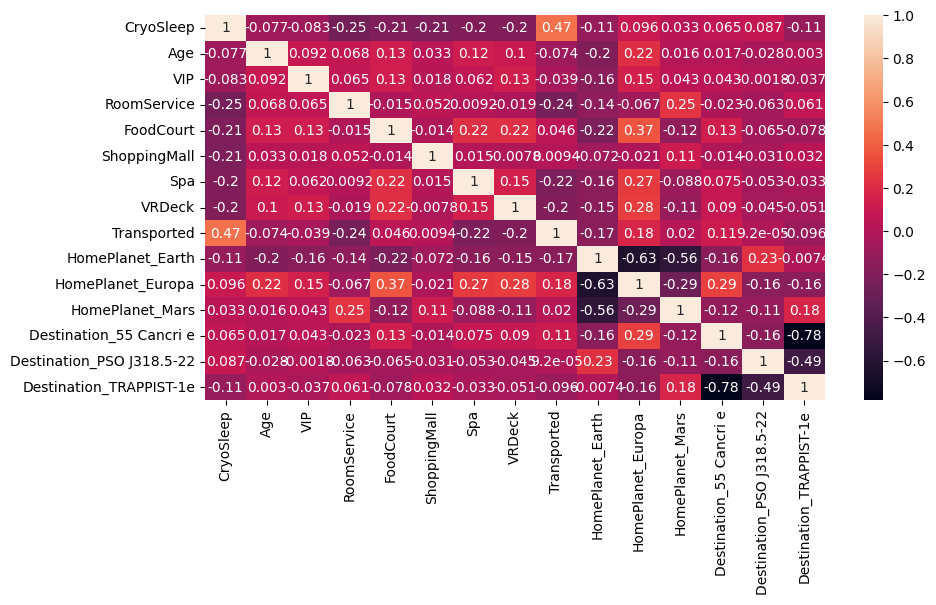

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(fin_df.corr(),annot=True)

C:\Users\sair4\AppData\Local\Temp\ipykernel_1852\1722873556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(fin_df.corr()[['Transported']].sort_values('Transported',ascending=False)[1:].reset_index(),x='Transported',y='index',palette='rainbow')


<Axes: xlabel='Transported', ylabel='index'>

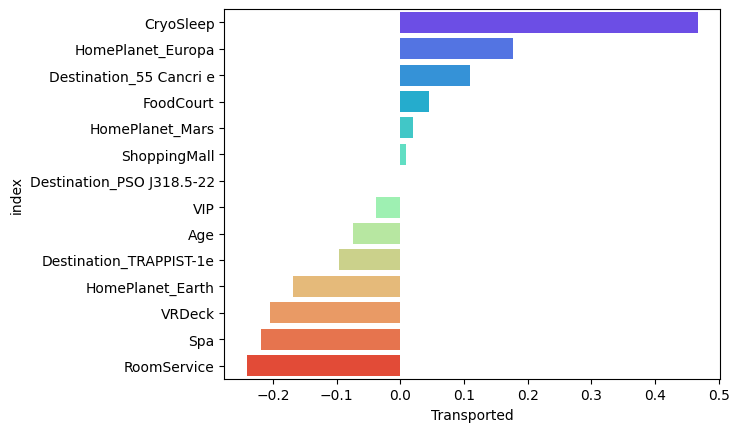

In [44]:
sns.barplot(fin_df.corr()[['Transported']].sort_values('Transported',ascending=False)[1:].reset_index(),x='Transported',y='index',palette='rainbow')

In [45]:
input_cols=list(fin_df.drop(columns='Transported'))
op_col='Transported'
print(input_cols)
print(op_col)

['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
Transported


In [46]:
x=fin_df[input_cols]
y=fin_df[op_col]

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10,n_estimators=300,max_features='sqrt')
rf.fit(x_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
rf.score(x_test,y_test)

0.78953421506613

In [50]:
from sklearn.model_selection import GridSearchCV
rf_grid=RandomForestClassifier(random_state=42)

In [61]:
param_grid={
    'n_estimators':[100,200,300,500],
    'max_depth':[None,6,7,10,12,15,18],
    'max_features':['auto','sqrt']
}

In [62]:
grid_search=GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)



In [ ]:
grid_search.fit(x_train,y_train)

In [64]:
print('Estimator:',grid_search.best_estimator_)
print('params',grid_search.best_params_)
print('best score',grid_search.best_score_)

Estimator: RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)
params {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
best score 0.8006923232082919


In [56]:
x_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')